<a href="https://colab.research.google.com/github/CamilaReis/facid_prova/blob/master/Analise_de_Dados_Facid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise de dados - Videogame
Disciplina: Uso Estratégico de Recursos da Informática
Alunas: Camila Macedo
        Bruna Loureiro
        Ana Victoria





Para importar a biblioteca pandas. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo **CSV** (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos **xlsx** entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação.

 

#importando a biblioteca pandas

In [ ]:
import pandas as pd

Primeiramente lermos o dataset, o mesmo foi comitado no GitHUB, Logo em seguida trocamos as colunas do dataset para a sua traducao em portugues e utilizamos o metodo 'videogame.head' que mostra as 5 primeiras linhas do datataset

In [ ]:
videogame = pd.read_csv("https://raw.githubusercontent.com/CamilaReis/dataset_videogame/master/videogame.csv")
videogame.columns = ["Ranking", "Nome", "Plataforma","Ano", "Genero", "Editora", "Vendas_NA","Vendas_EU","Vendas_JP","Vendas_Outros","Vendas_Global"]
videogame.head()

,Ranking,Nome,Plataforma,Ano,Genero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outros,Vendas_Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


 Para descobrir a quantidade total de linhas do nosso dataset a forma e a seguinte dos nossos dados podemos utilizar o ```videogame.shape```, Onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [ ]:
videogame.shape

(16598, 11)

In [ ]:
len(videogame)

16598

Uma forma para "separar" as informações apenas do **Jogo Nº 1** é chamando o método ```videogame.query("Ranking==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "Ranking==1", for verdadeira.

Tendo as informações do **Jogo Nº 1** podemos chamar o ```videogame.describe()```, para analisar as estatítiscas gerais dos dados.

In [ ]:
videogame = videogame.query("Ranking==1")
videogame.head()

,Ranking,Nome,Plataforma,Ano,Genero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outros,Vendas_Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
videogame.describe()

,Ranking,Ano,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outros,Vendas_Global
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das colunas que compoem nosso dataset

In [ ]:
videogame.mean()

Ranking          8300.605254
Ano              2006.406443
Vendas_NA           0.264667
Vendas_EU           0.146652
Vendas_JP           0.077782
Vendas_Outros       0.048063
Vendas_Global       0.537441
dtype: float64

Como calcular a média apenas da coluna Vendas_Global?

Com o comando ```videogame["Vendas_Global"]```, obtemos os valores da coluna Vendas_Global e para calcular a média de todos os valores executamos ```videogame["Vendas_Global"].means()```


In [ ]:
videogame["Vendas_Global"].mean()

0.53744065550074

Nós calculamos uma média geral, uma média para o Jogo 1. Agora eu quero calcular a média da coluna Vendas_Global para os 5 primeiros do ranking, podemos fazer isso usando o método ```.groupby(Ranking)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.



In [ ]:
vendas_global_por_jogo = videogame.groupby("Ranking")["Vendas_Global"].mean()
vendas_global_por_jogo.head()

Ranking
1    82.74
2    40.24
3    35.82
4    33.00
5    31.37
Name: Vendas_Global, dtype: float64

Para ordenar por determinada coluna , utiliza-se o comando 'sort_values'

In [ ]:
videogame.sort_values(by="Plataforma")

,Ranking,Nome,Plataforma,Ano,Genero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outros,Vendas_Global
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3940,3942,River Raid II,2600,1988.0,Shooter,Activision,0.47,0.03,0.00,0.01,0.51
2406,2408,Enduro,2600,1982.0,Misc,Quelle,0.81,0.05,0.00,0.01,0.87
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
4378,4380,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,Atari,0.42,0.02,0.00,0.00,0.45
...,...,...,...,...,...,...,...,...,...,...,...
1147,1149,Far Cry 4,XOne,2014.0,Shooter,Ubisoft,0.79,0.68,0.01,0.13,1.61
5762,5764,Disney Infinity 3.0,XOne,2015.0,Action,Disney Interactive Studios,0.18,0.10,0.00,0.03,0.31
16276,16279,Assetto Corsa,XOne,2016.0,Racing,505 Games,0.00,0.01,0.00,0.00,0.01
2292,2294,Dragon Age: Inquisition,XOne,2014.0,Role-Playing,Electronic Arts,0.55,0.28,0.00,0.07,0.91


Quantas plataformas diferentes temos no nosso dataset? Para isso utiliza-se o camando `value_counts()`

In [ ]:
videogame["Plataforma"].value_counts()


DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

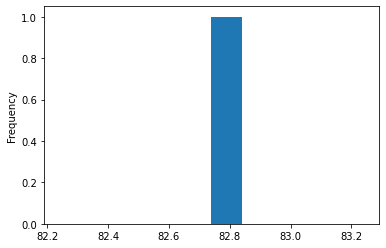

In [ ]:
videogame["Vendas_Global"].plot.hist()

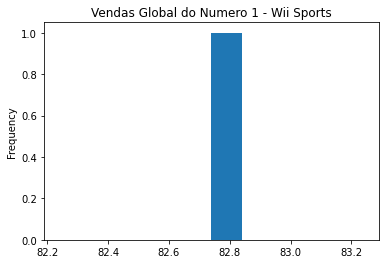

In [ ]:
videogame.query("Ranking == 1")["Vendas_Global"].plot(kind='hist',
                                              title="Vendas Global do Numero 1 - Wii Sports")

Outra ferramenta muito poderosas para manipular gráficos, uma delas é o `matplotlib`

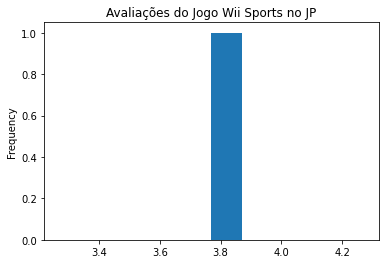

In [ ]:
videogame.query("Ranking == 1")["Vendas_JP"].plot(kind='hist',
                                              title="Avaliações do Jogo Wii Sports no JP")

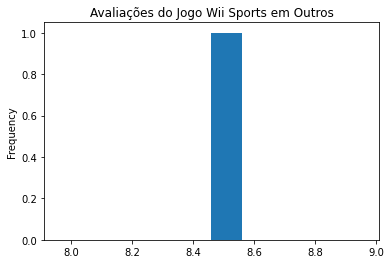

In [ ]:
videogame.query("Ranking == 1")["Vendas_Outros"].plot(kind='hist',
                                                   title="Avaliações do Jogo Wii Sports em Outros")


Mudar o nome da coluna **Vendas_Global** do dataframe  para A 

In [ ]:
videogame.head()
videogame = videogame.rename(columns={'Vendas_Global': 'A'})
videogame.head()

,Ranking,Nome,Plataforma,Ano,Genero,Editora,Vendas_NA,Vendas_EU,Vendas_JP,Vendas_Outros,A
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
